# Question (1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

| orientation | 1 |
| ----------- | --|
|  Dist| RSSI |
|  1   | -49  |
|  7   | -64  |
|  37  | -80  |
|  42  | -84  |
|  11  | -69  |
|  21  | -76  |

| orientation | 2 |
| ----------- | - |
|  Dist| RSSI |
|  2   | -51  |
|  8   | -66  |
|  103  | -91 |
|  147 | -96  |
|  12  | -70  |
|  15  | -72  |

| orientation | 3 |
| ----------- | - |
|  Dist| RSSI |
|  3   | -57  |
|  9   | -67  |
|  29  | -78  |
|  131 | -92  |
|  5   | -61  |
|  66  | -90  |

| orientation | 4 |
| ----------- | --|
|  Dist| RSSI |
|  4   | -60  |
|  13  | -71  |
|  17  | -74  |
|  23  | -77  |
|  6   | -63  |
|  25  | -76  |


In [2]:
#now take the array of dist and rssi samples
dist=[1,7,37,42,11,21,2,8,103,147,12,15,3,9,29,131,5,66,4,13,17,23,6,25]
RSSI=[-49,-64,-80,-84,-69,-76,-51,-66,-91,-96,-70,-72,-57,-67,-78,-92,-61,-90,-60,-71,-74,-77,-63,-76]
y=RSSI

In [3]:
x=[]
for i in range(24):
         x.append(np.log10(dist[i]))
x=np.array(x)
x

array([0.        , 0.84509804, 1.56820172, 1.62324929, 1.04139269,
       1.32221929, 0.30103   , 0.90308999, 2.01283722, 2.16731733,
       1.07918125, 1.17609126, 0.47712125, 0.95424251, 1.462398  ,
       2.1172713 , 0.69897   , 1.81954394, 0.60205999, 1.11394335,
       1.23044892, 1.36172784, 0.77815125, 1.39794001])

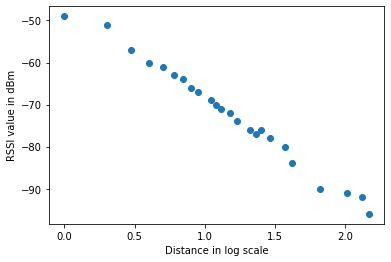

In [4]:
plt.scatter(x,y)
plt.xlabel("Distance in log scale")
plt.ylabel("RSSI value in dBm")
plt.show()

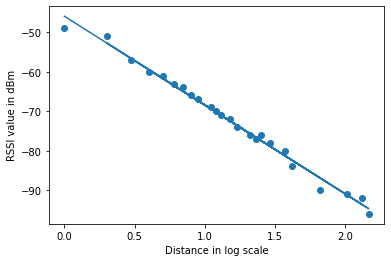

In [5]:
m,b=np.polyfit(x,y,1) #m=slope b=intercept
plt.scatter(x,y)
plt.xlabel("Distance in log scale")
plt.ylabel("RSSI value in dBm")
plt.plot(x,m*x+b)

In [6]:
#slope=-10*path loss exponent
print("slope=",m)
Path_loss_exponent=m/10
print("Path_loss_exponent is:",abs(Path_loss_exponent))

slope= -22.477739128723915
Path_loss_exponent is: 2.2477739128723915


In [7]:
u=[] 
for i in range(23):
    u.append(m*x[i]+b)
    
u    

[-45.97583962739642,
 -64.97173290903277,
 -81.22546888218942,
 -82.46281371784664,
 -69.38399273494431,
 -75.69634000539077,
 -52.74231333985228,
 -66.275260764764,
 -91.21986967290391,
 -94.69223328702712,
 -70.23339414866615,
 -72.41171214002247,
 -56.700446723754425,
 -67.42505382011242,
 -78.8472403265373,
 -93.56731147588198,
 -61.687105043664474,
 -86.87507354375819,
 -59.508787052308136,
 -71.0147677047257,
 -73.63354949335698,
 -76.5844026897216,
 -63.46692043621029]

In [8]:
deviation=[]
for i in range(23):
    deviation.append((y[i]-u[i])**2)
variance=sum(deviation)/len(deviation)
print("variance=",variance)

variance= 1.4668121641605512


# Question (2)

𝑃𝑟[𝑑]𝑑𝐵𝑚 = 𝑃𝑡[𝑑]𝑑𝐵𝑚 − 𝑃𝐿(𝑑)[𝑑𝐵]
         = 𝑃𝑡[𝑑𝐵𝑚] − [𝑃L(𝑑0)]dB − 10𝑛 log10(d/d0)
         = 𝑃𝑟 (𝑑0) [𝑑𝐵𝑚] − 10𝑛 log10(d/d0)

In [10]:
d0=1
Pr_d0_dBm=-49
therotical_dist=[]
n=abs(Path_loss_exponent)
for i in range(5):
     therotical_dist.append(10**((Pr_d0_dBm-y[i+1])/(10*n)))
therotical_dist

[4.648650558386007,
 23.94099867406648,
 36.06584425578226,
 7.75834703056368,
 15.892361022985314]

In [11]:
error_in_dist=[]
for i in range(5):
    error_in_dist.append(dist[i+1]-therotical_dist[i])
print("Error in dist with actual value =",error_in_dist)    
avg_error=sum(error_in_dist)/len(error_in_dist)
print("avg_error=",avg_error)

Error in dist with actual value = [2.3513494416139933, 13.059001325933519, 5.93415574421774, 3.24165296943632, 5.107638977014686]
avg_error= 5.938759691643251
